# Linear Regression

In [1]:
import sys
import math
import numpy as np
import pandas as pd
from sklearn import datasets, metrics

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('seaborn-whitegrid')
sns.set_theme(style="white")

print("Python version: {}". format(sys.version))
print("NumPy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
print("matplotlib version: {}". format(matplotlib.__version__))
print("seaborn version: {}". format(sns.__version__))

Python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:24:02) 
[Clang 11.1.0 ]
NumPy version: 1.22.4
pandas version: 1.4.0
matplotlib version: 3.5.1
seaborn version: 0.11.2


In [2]:
X, y = datasets.make_regression(
    n_samples=101, n_features=1, noise=15, random_state=4
)

In [3]:
X.shape, y.shape

((101, 1), (101,))

In [4]:
# df = pd.DataFrame({'X': X[:,0], 'Y': y})
# df.head()

Text(0, 0.5, 'Y')

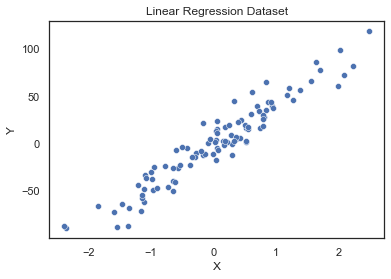

In [5]:
sns.scatterplot(x=X[:,0], y=y)
plt.title("Linear Regression Dataset")
plt.xlabel("X")
plt.ylabel("Y")

In [6]:
def mean_squared_error(X, y, w, b):
    n_samples, _ = X.shape
    return np.sum(np.power(y - (np.dot(X, w) + b), 2)) / n_samples


In [7]:
w = np.random.rand(X.shape[1])
b = 0
y_pred = np.dot(X, w) + b
print(y_pred.shape)
print(w, b)
print(metrics.mean_squared_error(y, y_pred))
print(mean_squared_error(X, y, w, b))

(101,)
[0.88930373] 0
1791.6721592506508
1791.6721592506508


In [8]:
class LinearRegression:
    def __init__(self, lr: int = 0.01, n_iters: int = 1000) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, n_features = X.shape
        self.weights = np.random.rand(n_features)
        self.bias = 0  # starting from the origin

        for _ in range(self.n_iters):
            # y = m * x + c
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / num_samples) * np.dot(X.T, y_pred - y)
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def params(self):
        return {'weights': self.weights, 'bias': self.bias}

In [9]:
lin_reg = LinearRegression()

lin_reg.fit(X, y)

X_test = np.random.randint(low=-3, high=3, size=(10, 1))
y_pred = lin_reg.predict(X_test)
y_pred

array([  -0.61766791,  -85.64509902,  -43.13138347,  -85.64509902,
         -0.61766791,   84.4097632 ,   41.89604764,   84.4097632 ,
       -128.15881458,   84.4097632 ])

In [10]:
print(lin_reg.__dict__)

{'lr': 0.01, 'n_iters': 1000, 'weights': array([42.51371556]), 'bias': -0.6176679120701335}


In [11]:
y_pred = lin_reg.predict(X)
print(y_pred.shape)
print(metrics.mean_squared_error(y, y_pred))

(101,)
157.94518177112508


Text(0, 0.5, 'Y')

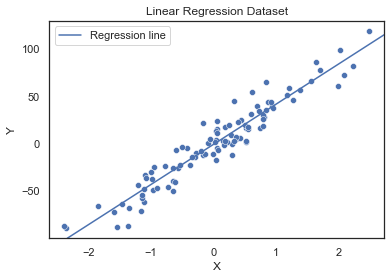

In [12]:
sns.scatterplot(x=X[:,0], y=y)
plt.axline((0, lin_reg.bias), slope=lin_reg.weights, color='C0', label='Regression line')
plt.title("Linear Regression Dataset")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")